<a href="https://colab.research.google.com/github/Bibek0130/Sentiment-analysis/blob/master/Sentiment_analysis_using_glove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Sentiment Analysis
It is also called opinion mining. This is where the text is used to make sentiment of the text. THe sentiment can be positive, negative and neutral.

The flow for sentiment Analysis is :

Datasets --> Cleaning and preprocessing --> Choosing algorithm --> constructing our model pipelines --> Evaluations --> predictions

1. Dataset
2. Data Preprocessing
    removing numbers, punctuation marks, special chars and whitespaces
3. Word Embeddings
    Using GloVe to represent Movie retviews from text-to-numeric formats
4. Train models
    Train your models
5. Predictions
    perform predictions and evaluate how model performs

###Data
The data used for this task will be the Amazon reviews dataset, which consists of reviews from Amazon customers downloaded from Xiang Zhang’s Google Drive dir[1]. The dataset spans 18 years, including ~35 million reviews up to March 2013. Reviews include product and user information, ratings, and a plaintext review. For more information, please refer to the following paper: Hidden Factors and Hidden Topics: Understanding Rating Dimensions with review text [2].

The Amazon reviews dataset is constructed by taking review scores 1 and 2 as negative and 4 and 5 as positive. Samples of score 3 is ignored. In the dataset, class 1 is the negative, and class 2 is the positive. Each class has 1,800,000 training samples and 200,000 testing samples.


In [ ]:
#downloading directly from kaggle using opendatasets
!pip install opendatasets
import opendatasets as od

od.download("https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mainalibibek01
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


100%|██████████| 25.7M/25.7M [00:00<00:00, 243MB/s]

In [ ]:
import pandas as pd
dataset = "/content/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv"
df = pd.read_csv(dataset)
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
#see how oour data looks
df.shape

(50000, 2)

In [ ]:
#checking for any null values
df.isnull().values.any()
#now we know that we donot have any null values, so we are good to go.

False

<Axes: xlabel='sentiment', ylabel='count'>

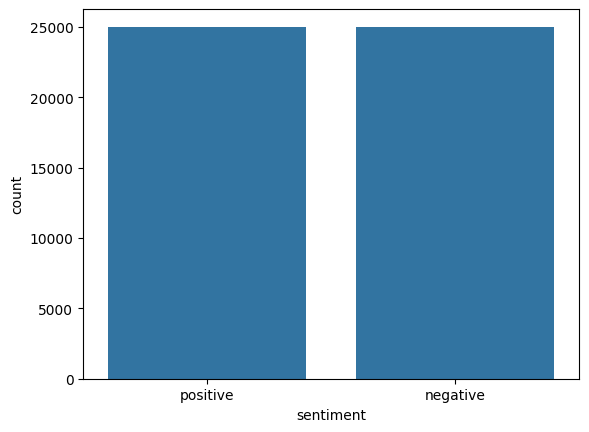

In [ ]:
#observing the distriburtion of sentiment in our datasets
import seaborn as sns
sns.countplot(x='sentiment', data=df)
#from the plot we know our data set is uniform.

##Data Preprocessing

To prepare our model for training, we need to do the following data preprocessing techniques:

1. Data cleaning:
    1. remove unwanted characters
    2. Handle missing values
    3. remove duplicates
2. Encode labels
    convert labels into numerical formats.
    categorical elements like postive into 1 and negative into 0.
4. split the dataset
    split the dataset into trainig and test (80, 20)
5. Tokenization
    change words into numerical indices using tokenizer.
    Because we are using sequential model, tokenizer is used. If we use non-sequential modedl lilke Logistic Regression, NB, SVMm etc we use Vectirization to convert the dataset into numerical formats.







#Data cleaning

1. In cleaning the text, we do the following tasks.
  1. Lower casing
  2. removing HTML tags
  3. removing multiple white spaces
  4. convert to lower case
  5. removing punctuation and numbers
  6. removing single characters
  7. removing stopwords


In [ ]:
import re
#downloadinfgthe stoip words from nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def clean_text(text):
  #re.sub(pattern, replacement, string)
  text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
  text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
  text = text.lower()  # Convert to lowercase
  #removing puctiation and numbers
  text = re.sub('[^a-zA-Z]',' ',text)
  #removing single characters
  text = re.sub(r"\s+[a-zA-Z]\s+",' ',text)
  #remove stopwords
  pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
  text = pattern.sub('',text)
  text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
  return text

df['review'] = df['review'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


2. Handle missing values

In [ ]:
df.head()

,review,sentiment
0,one reviewers mentioned watching oz episode yo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


# Encode labels
positive -> 1
Neagtive -> 0

In [ ]:

df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [ ]:
print(df['sentiment'].isna())
#verifying that there is no null values in sentiment
print(df['sentiment'].isna().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Name: sentiment, Length: 50000, dtype: bool
0


In [ ]:
from sklearn import preprocessing
Le = preprocessing.LabelEncoder()
df['sentiment'] = Le.fit_transform(df['sentiment'])

In [ ]:
df['sentiment'].unique()
df['review'][0]

'one reviewers mentioned watching oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle cl

In [ ]:
df.head()

,review,sentiment
0,one reviewers mentioned watching oz episode yo...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1


# Split the datasets into training and testing
training -> 80%
testing -> 20%

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size = 0.2, random_state = 42)

#Embedding layer
embedding layer is our tokenization
embedding layer converts our text data into numeric format
as we are using it as a layer, it is a first lauer for deep learning models in keras

In [ ]:
#using keras tokenization of the words
!pip install tensorflow-text
from tensorflow.keras.preprocessing.text import Tokenizer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 106.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [ ]:
#our embedding layer's input should be in numeric format
#so, using tokenizer from keras.preprocessing.text library
#The method fit_on_text trains the tokenizer
# the method texts_to_sequences converts sentences to their numeric form

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

AttributeError: 'int' object has no attribute 'lower'

In [ ]:
#setting vocab klebgth
vocab_length = len(word_tokenizer.word_index) + 1
vocab_length



185776

In [ ]:
#then padding all the reviews to fixed 100
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
import numpy as np
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/imdb-dataset-of-50k-movie-reviews/glove.6B.100d.txt', encoding='utf8')

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()
print(embeddings_dictionary)

In [ ]:
# Create Embedding Matrix having 100 columns
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    embedding_matrix[index] = embedding_vector

embedding_matrix.shape

NameError: name 'zeros' is not defined

In [ ]:
from keras.layers import LSTM, Bidirectional, Dense, Dropout, Embedding, Flatten
from keras.models import Sequential


In [ ]:
# Neural Network architecture

snn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

snn_model.add(embedding_layer)

snn_model.add(Flatten())
snn_model.add(Dense(1, activation='sigmoid'))
# Model compiling

snn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(snn_model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │      18,577,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,577,600 (70.87 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 18,577,600 (70.87 MB)

None


In [ ]:
Bilstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen, trainable=True)

Bilstm_model.add(embedding_layer)
Bilstm_model.add(Bidirectional(LSTM(128, return_sequences=True)))
# Bilstm_model.add(Dropout(0.2))
# Bilstm_model.add(Bidirectional(LSTM(64)))
Bilstm_model.add(Dense(64, activation='relu'))
Bilstm_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
#model compiling
Bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(Bilstm_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │      18,577,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,577,600 (70.87 MB)

 Trainable params: 18,577,600 (70.87 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Model training

snn_mscore = snn_model.evaluate(X_test, y_test, verbose=1)odel_history = snn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.4984 - loss: 0.6931 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 2/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.4979 - loss: 0.6932 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 3/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.4997 - loss: 0.6932 - val_acc: 0.5000 - val_loss: 0.6932
Epoch 4/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5009 - loss: 0.6932 - val_acc: 0.5000 - val_loss: 0.6932
Epoch 5/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.4953 - loss: 0.6932 - val_acc: 0.5000 - val_loss: 0.6932
Epoch 6/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5000 - loss: 0.6932 - val_acc: 0.5000 - val_loss: 0.6932


In [ ]:
score = snn_model.evaluate(X_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.4978 - loss: 0.6932


In [ ]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6931977272033691
Test Accuracy: 0.4961000084877014


In [ ]:
import tensorflow as tf  # Import TensorFlow

# Preprocess X_test in the same way as X_train:
# 1. Convert text to sequences of numerical indices
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# 2. Pad sequences to ensure uniform length
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

# Preprocess y_test if it contains strings:
# Assuming labels are 'positive' and 'negative', and you want to convert them to 1 and 0:
y_test_numerical = [1 if label == 'positive' else 0 for label in y_test]

# Convert X_test_padded and y_test_numerical to TensorFlow tensors
X_test_padded = tf.convert_to_tensor(X_test_padded)  # Convert to tf.Tensor
y_test_numerical = tf.convert_to_tensor(y_test_numerical)  # Convert to tf.Tensor

# Finally, evaluate the model using the preprocessed data:
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test_numerical, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 2.9689
Test Accuracy: 0.4652
